# Exploratory Data Analysis (EDA) for Data Engineering

## 1. Company and Location Analysis
- Which companies are most actively hiring for data engineering roles?
- How are data engineering roles distributed across different locations (e.g., states, cities)?
- What is the average company rating for companies offering data engineering roles?

## 2. Job Title and Description Analysis
- What key skills and technologies are most frequently mentioned in data engineering job descriptions?
- Are there any patterns or trends in the job descriptions for data engineering roles?
- What education and experience are typically required for data engineering roles?
- How do job requirements for data engineering roles differ across industries or seniority levels?

## 3. Salary Analysis
- What is the salary range for data engineering roles?
- How do Jobs & salary estimates for data engineering roles vary by location, company size,Type or industry?
- Are senior data engineering roles significantly higher in salary than junior roles?



### importing 

In [5]:
!pip install -U kaleido

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.11/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp

import warnings


warnings.filterwarnings('ignore')

pio.renderers.default = 'svg'

color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("../Data/Cleaned/glassdoor-cleaned.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,70000,Medium,Company - Private,Information Technology,Information Technology Support Services,...,na,"['sql', 'java', 'python']",[],[],[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,3.9,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,Unknown,NaN,NaN,NaN,...,na,"['sql', 'c']",[],['ssis'],['snowflake'],[],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,121500,Small,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,na,"['sql', 'python']",['aws'],[],['databricks'],['spark'],[],[],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",115173,Very Large,Company - Public,Information Technology,Computer Hardware Development,...,na,"['c', 'python']",[],['tableau'],[],[],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,117000,Small,Company - Public,NaN,NaN,...,na,['sql'],[],['tableau'],['oracle'],[],[],[],bachelor,5-10 years


### 1. Company and Location Analysis

#### Which companies are most actively hiring for data engineering roles?

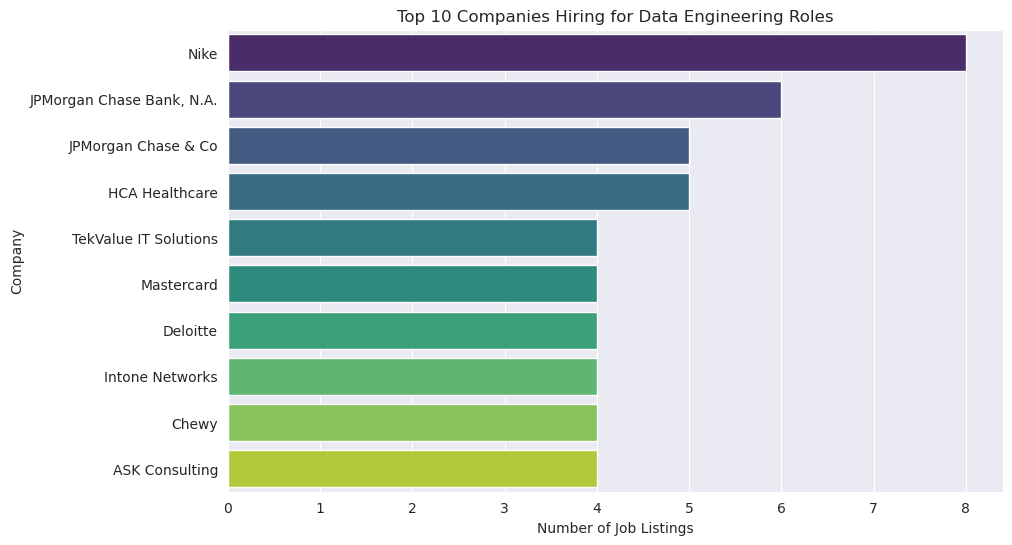

In [3]:
top_companies = df['company'].value_counts().head(10)  # Top 10 companies

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title('Top 10 Companies Hiring for Data Engineering Roles')
plt.xlabel('Number of Job Listings')
plt.ylabel('Company')
plt.show()

#### How are data engineering roles distributed across different locations (e.g., states, cities)?

In [4]:

# Count the occurrences of each state
state_counts = df['job_state'].value_counts().reset_index()
state_counts.columns = ['State', 'Job Listings']

# Plot the map
fig = px.choropleth(state_counts, 
                    locations='State', 
                    locationmode="USA-states", 
                    color='Job Listings',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Distribution of Data Engineering Roles Across the USA")
fig.show()


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


#### What is the average company rating for companies offering data engineering roles?

In [154]:

# Highest Count of Industries
industry_counts = df['company_industry'].value_counts().head(15).reset_index()
industry_counts.columns = ['Industry', 'Count']

# Average Salary Estimate for Each Company
salary_by_company = df.groupby('company')['salary_estimate'].mean().reset_index()
salary_by_company.columns = ['Company', 'Average Salary']

# Average Rating for Each Company
rating_by_company = df.groupby('company')['company_rating'].mean().reset_index()
rating_by_company.columns = ['Company', 'Average Rating']

# Merge average salary and rating for each company
company_salary_rating = pd.merge(salary_by_company, rating_by_company, on='Company')

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    specs=[[{"type": "bar"}, {"type": "scatter"}]])

# Add bar chart for highest count industries
fig.add_trace(
    go.Bar(x=industry_counts['Industry'],
           y=industry_counts['Count'],
           marker=dict(color="crimson"),
           name="Top 15 Industries by Count"),
    row=1, col=1
)

# Add scatter plot for average rating vs. average salary
fig.add_trace(
    go.Scatter(x=company_salary_rating['Average Salary'],
               y=company_salary_rating['Average Rating'],
               mode='markers',
               marker=dict(color="teal", size=10, opacity=0.8),
               text=company_salary_rating['Company'],
               hoverinfo="text+x+y",
               name="Rating vs Salary"),
    row=1, col=2
)

# Update bar chart properties for industries
fig.update_xaxes(title_text="Industry", row=1, col=1, tickangle=45)
fig.update_yaxes(title_text="Count", row=1, col=1)

# Update scatter plot properties for salary vs. rating
fig.update_xaxes(title_text="Average Salary", row=1, col=2)
fig.update_yaxes(title_text="Average Rating", row=1, col=2)

# Set theme, margin, and annotation in layout
fig.update_layout(
    template="plotly_dark",
    title_text="Top 15 Industries by Count and Rating vs. Salary",
    margin=dict(r=10, t=25, b=40, l=60),
    annotations=[
        dict(
            text="Source: Your Dataset",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

fig.show()

### 2. Job Title and Description Analysis

#### What key skills and technologies are most frequently mentioned in data engineering job descriptions?

In [155]:
cols = ['job_languages', 'job_cloud', 'job_viz', 'job_databases', 'job_bigdata', 'job_datatools', 'job_devops']

def safe_eval(x):
    try:
        return eval(x)
    except:
        return x

df[cols] = df[cols].astype(str).applymap(safe_eval)

### Visualizing the most in demand tools for Data Engineers

In [156]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c', 'c++', 'c#', 'sql', 'rust', 'bash']
cloud_tools = ['aws', 'azure', 'gcp']
viz_tools = ['power bi', 'tableau', 'excel', 'ssis', 'qlik', 'sap', 'looker']
databases = ['sql server', 'nosql', 'postgresql', 'mongodb', 'mysql', 'oracle', 'casandra', 'elasticsearch', 'dynamodb', 'snowflake', 'redis', 'neo4j', 'hive', 'databricks', 'redshift']
big_data = ['spark', 'hadoop', 'flink']
data_tools = ['airflow', 'kafka', 'dbt']
devops = ['gitlab', 'terraform', 'kubernetes', 'docker', 'jenkins', 'ansible']

In [157]:
def filtered_keywords(tools, keywords, title, head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(tools.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
    
    # get frequency of occurrence of word (as word only appears once per line)
    length = len(tools) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = sns.barplot(x="keywords", y="percentage", data=count_keywords, palette="deep")
    plt.xlabel("")
    plt.ylabel("Likelihood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)

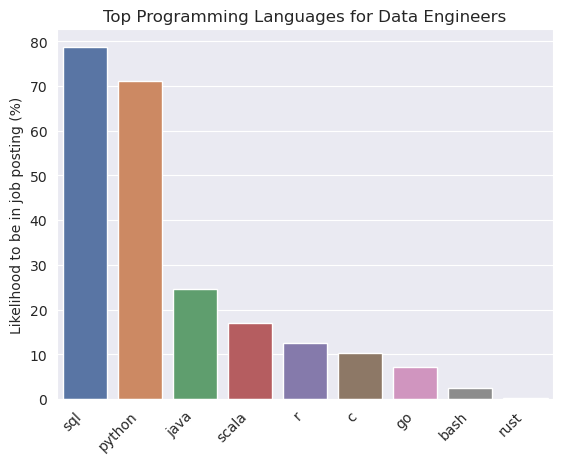

In [158]:
filtered_keywords(df['job_languages'], prog_languages, title="Top Programming Languages for Data Engineers")


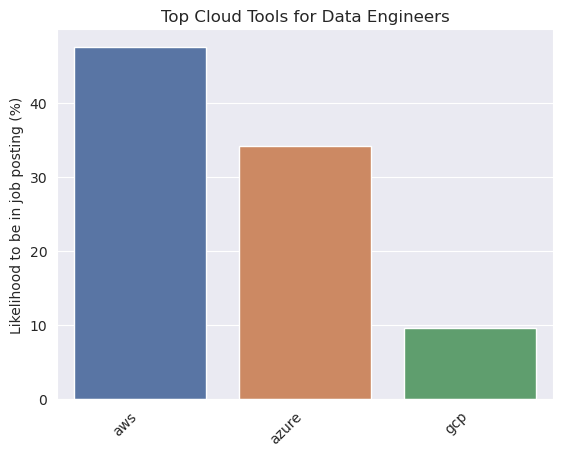

In [159]:
filtered_keywords(df['job_cloud'], cloud_tools, title="Top Cloud Tools for Data Engineers")

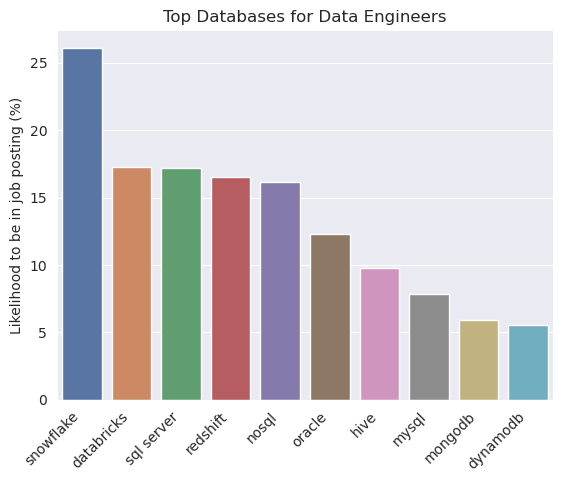

In [160]:
filtered_keywords(df['job_databases'], databases, title="Top Databases for Data Engineers")

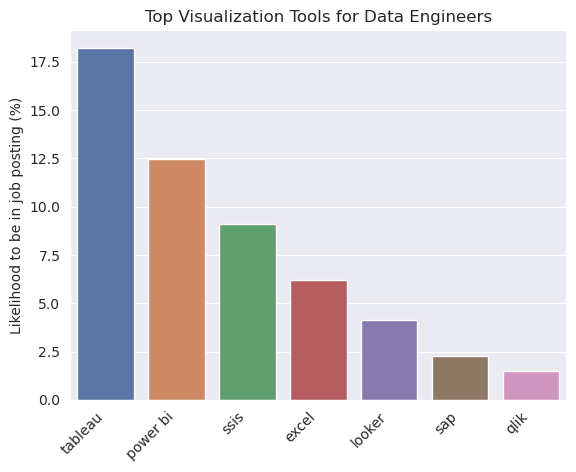

In [161]:
filtered_keywords(df['job_viz'], viz_tools, title="Top Visualization Tools for Data Engineers")


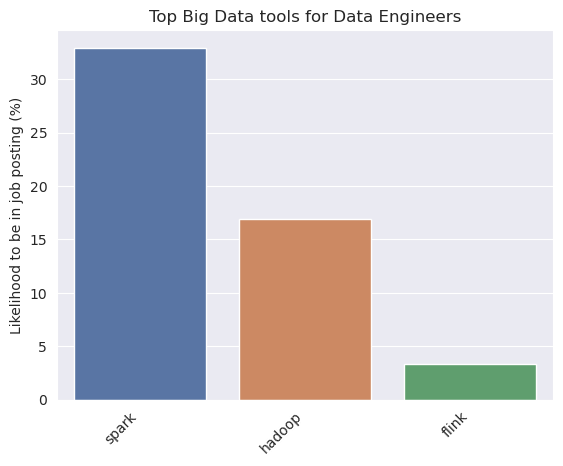

In [162]:
filtered_keywords(df['job_bigdata'], big_data, title="Top Big Data tools for Data Engineers")

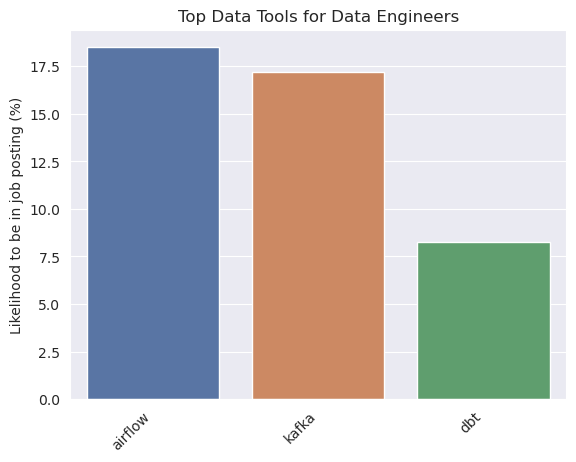

In [163]:
filtered_keywords(df['job_datatools'], data_tools, title="Top Data Tools for Data Engineers")

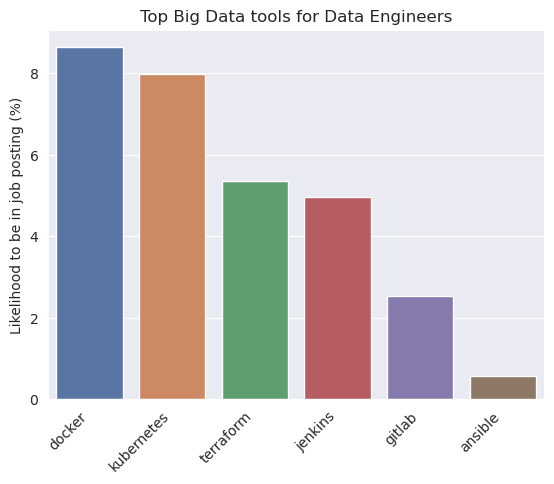

In [164]:
filtered_keywords(df['job_devops'], devops, title="Top Big Data tools for Data Engineers")


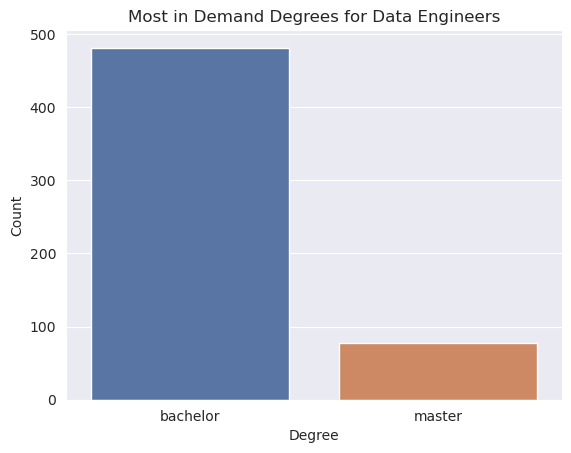

In [165]:
sns.countplot(data=df, x='job_education', palette="deep")

plt.title('Most in Demand Degrees for Data Engineers')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

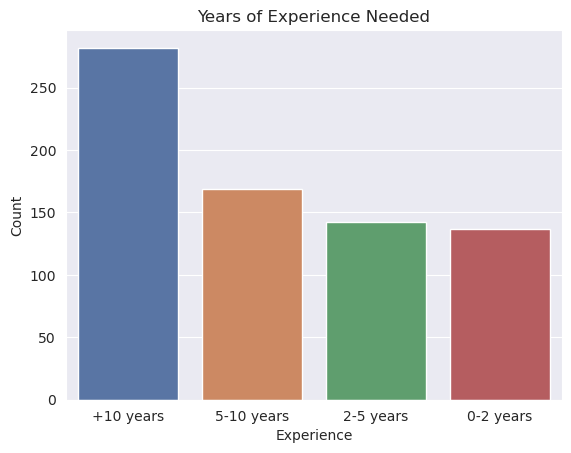

In [166]:
sns.countplot(data=df, x='job_experience', palette="deep", order = df['job_experience'].value_counts().index)

plt.title('Years of Experience Needed')
plt.xlabel('Experience')
plt.ylabel('Count')

plt.show()

## Data Engineer salary in United States

#### How much does a Data Engineer make in the United States?

In [167]:
avg_salary = df['salary_estimate'].mean()
print(f"Average base salary : ${round(avg_salary):,} per year")

Average base salary : $114,267 per year


#### What is the salary range for data engineering role?

In [168]:
min_salary = df['salary_estimate'].min()
max_salary = df['salary_estimate'].max()

print(f"Lowest salary : ${round(min_salary)} -- Highest salary : ${round(max_salary)}")

Lowest salary : $48600 -- Highest salary : $288000


In [169]:
fig = sp.make_subplots(
    rows=1, cols=2,
    subplot_titles=("Salary Distribution Histogram", "Salary Distribution Violin Plot")
)

# Add histogram
fig.add_trace(
    go.Histogram(
        x=df['salary_estimate'],
        marker=dict(color="crimson"),
        nbinsx=30  # Number of bins in histogram
    ),
    row=1, col=1
)

# Add violin plot
fig.add_trace(
    go.Violin(
        y=df['salary_estimate'],
        box_visible=True,
        line_color="royalblue",
        fillcolor="royalblue",
        opacity=0.6
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Salary Estimates Analysis",
    template="plotly_dark",
    showlegend=False,
    height=600,
    margin=dict(r=10, t=50, b=40, l=60)
)

# Update axis labels
fig.update_xaxes(title_text="Salary ($)", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Salary ($)", row=1, col=2)

fig.show()


### How do salary estimates for data engineering roles vary by location, company size, or industry?

#### 1. location

In [170]:
location_salary = df.groupby('job_state')['salary_estimate'].mean().reset_index()

fig_map = px.choropleth(
    location_salary,
    locations='job_state',
    locationmode='USA-states',
    scope = 'usa',
    color='salary_estimate',
    color_continuous_scale='Viridis',
    labels={'salary_estimate': 'Average Salary ($)'},
    title='Average Salary by Location'
)


fig_map.show()



#### 2. Company Size

In [171]:
avg_salary_by_size = df.groupby('company_size')['salary_estimate'].mean().reset_index()
size_count = df.groupby('company_size').size().reset_index()


fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["No of Jobs by Company Size", "Salary Distribution by Company Size"],
    column_widths=[0.5, 0.5]
)


fig.add_trace(
    go.Bar(
        x=size_count['company_size'],
        y=size_count[0],
        marker=dict(color='royalblue'),
        name='Num Jobs Per Size'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df['company_size'],
        y=df['salary_estimate'],
        mode='markers',
        marker=dict(color='lightcoral', size=10),
        name='Individual Salaries'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Scatter(
        x=avg_salary_by_size['company_size'],
        y=avg_salary_by_size['salary_estimate'],
        mode='markers',
        marker=dict(color='blue', size=12, symbol='circle'),
        name='Mean Salary'
    ),
    row=1, col=2
)


fig.update_layout(
    template="plotly_white",
    title_text="Salary Estimates by Company Size",
    showlegend=False,
    height=500,
    margin=dict(r=10, t=50, b=40, l=60)
)


fig.update_xaxes(title_text="Company Size")
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Salary ($)", row=1, col=2)


fig.show()


In [172]:
avg_salary_by_size = df.groupby('company_type')['salary_estimate'].median().reset_index()
size_count = df.groupby('company_type').size().sort_values(0,ascending=False).reset_index()


fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["No of Jobs by Company Type", "Salary Distribution by Company Size"],
    column_widths=[0.5, 0.5]
)


fig.add_trace(
    go.Bar(
        x=size_count['company_type'],
        y=size_count[0],
        marker=dict(color='royalblue'),
        name='Num Jobs Per Size'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df['company_type'],
        y=df['salary_estimate'],
        mode='markers',
        marker=dict(color='lightcoral', size=10),
        name='Individual Salaries'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Scatter(
        x=avg_salary_by_size['company_type'],
        y=avg_salary_by_size['salary_estimate'],
        mode='markers',
        marker=dict(color='blue', size=12, symbol='circle'),
        name='Mean Salary'
    ),
    row=1, col=2
)


fig.update_layout(
    template="plotly_white",
    title_text="Salary Estimates by Company Type",
    showlegend=False,
    height=500,
    margin=dict(r=10, t=50, b=40, l=60)
)


fig.update_xaxes(title_text="Company Type")
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Salary ($)", row=1, col=2)


fig.show()


#### Company Industry & Role

In [173]:
avg_salary_by_industry_role = df.groupby(['company_industry', 'seniority'])['salary_estimate'].mean().reset_index()


top_industries = df['company_industry'].value_counts().head(10).index


filtered_avg_salary = avg_salary_by_industry_role[avg_salary_by_industry_role['company_industry'].isin(top_industries)]


fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Salary Distribution by Role", "Average Salary by Top 10 Industries"],
    column_widths=[0.5, 0.5]
)


fig.add_trace(
    go.Box(
        x=df['seniority'],
        y=df['salary_estimate'],
        marker=dict(color='lightcoral'),
        name='Salary Distribution'
    ),
    row=1, col=1
)


for role in df['seniority'].unique():
    industry_data = filtered_avg_salary[filtered_avg_salary['seniority'] == role]
    fig.add_trace(
        go.Bar(
            x=industry_data['company_industry'],
            y=industry_data['salary_estimate'],
            name=f'Average Salary ({role})'
        ),
        row=1, col=2
    )


fig.update_layout(
    template="plotly_white",
    title_text="Comparison of Salaries by Role and Top 10 Industries",
    showlegend=True,
    height=600,
    margin=dict(r=10, t=50, b=40, l=60)
)


fig.update_xaxes(title_text="Role", row=1, col=1)
fig.update_yaxes(title_text="Salary ($)", row=1, col=1)
fig.update_xaxes(title_text="Industry", row=1, col=2)
fig.update_yaxes(title_text="Average Salary ($)", row=1, col=2)


fig.show()


In [174]:
grouped = df.groupby(['company_revenue', 'seniority']).agg(
    count=('seniority', 'size'),
    avg_salary=('salary_estimate', 'mean')
).reset_index()


grouped = grouped.sort_values('company_revenue')


color_map = {'Junior': 'lightblue', 'Senior': 'darkblue'}


seniorities = grouped['seniority'].unique()


fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Count of Roles by Revenue and Seniority", "Average Salary by Revenue and Seniority")
)


for seniority in seniorities:
    df_sen = grouped[grouped['seniority'] == seniority]
    fig.add_trace(
        go.Bar(
            x=df_sen['company_revenue'],
            y=df_sen['count'],
            name=seniority,
            marker_color=color_map.get(seniority),
            legendgroup=seniority,
            showlegend=True
        ),
        row=1, col=1
    )


for seniority in seniorities:
    df_sen = grouped[grouped['seniority'] == seniority]
    fig.add_trace(
        go.Scatter(
            x=df_sen['company_revenue'],
            y=df_sen['avg_salary'],
            mode='markers+lines',
            name=seniority,
            marker=dict(color=color_map.get(seniority), size=10),
            line=dict(color=color_map.get(seniority)),
            legendgroup=seniority,
            showlegend=True # Hide legend for scatter plots
        ),
        row=1, col=2
    )


fig.update_layout(
    barmode='group',
    height=600,
    width=1200,
    title_text="Company Revenue and Seniority: Counts and Salary Estimates",
    legend_title_text='Seniority'
)


fig.update_xaxes(title_text="Company Revenue", row=1, col=1)
fig.update_yaxes(title_text="Count of Roles", row=1, col=1)


fig.update_xaxes(title_text="Company Revenue", row=1, col=2)
fig.update_yaxes(title_text="Average Salary (USD)", row=1, col=2)


fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=2)


fig.show()


#### Correlation Matrix

<AxesSubplot: >

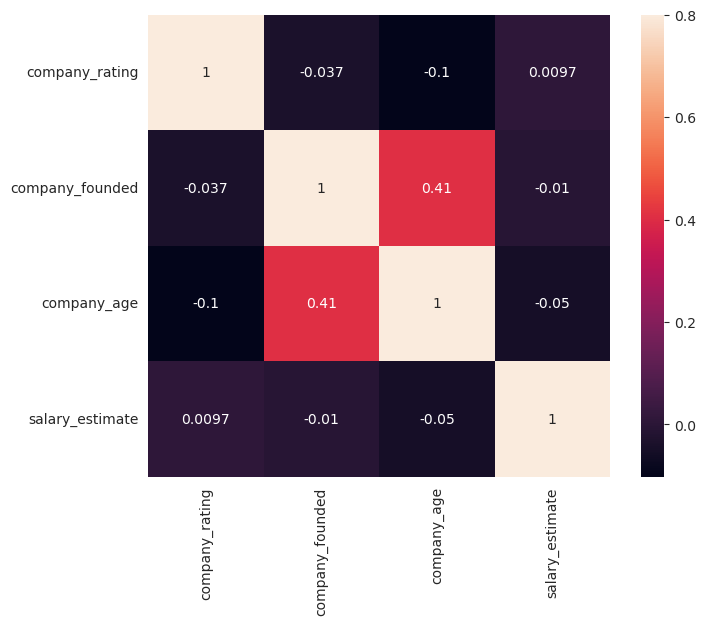

In [175]:
corrmat = df[['company_rating', 'company_founded', 'company_age', 'salary_estimate']].corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corrmat, vmax=0.8, annot=True, square=True)